##  衡量回归算法的标准，MSE vs MAE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 波士顿房产数据

In [2]:
boston = datasets.load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X = boston.data[:,5] # 只使用房间数量这个特征

In [7]:
X.shape

(506,)

In [8]:
y = boston.target

In [9]:
y.shape

(506,)

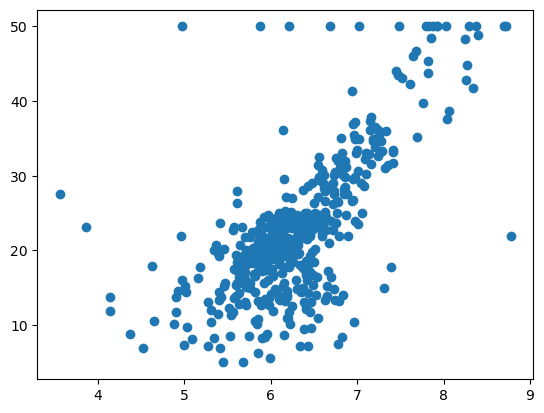

In [10]:
plt.scatter(X, y)
plt.show()

In [11]:
np.max(y)

50.0

In [12]:
X = X[y < 50.0].reshape(-1,1)
y = y[y < 50.0].reshape(-1,1)

In [13]:
X.shape

(490, 1)

In [14]:
y.shape

(490, 1)

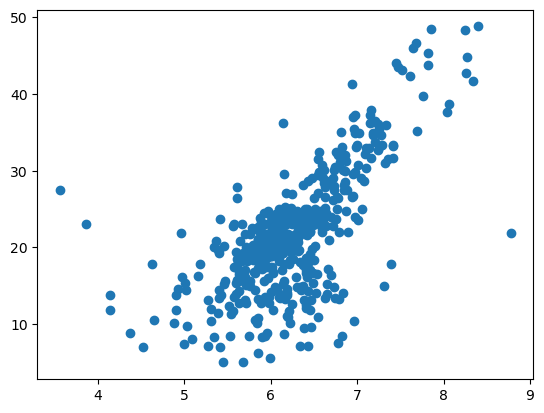

In [15]:
plt.scatter(X, y)
plt.show()

### 使用简单线性回归法

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=666)

In [17]:
X_train.shape

(392, 1)

In [18]:
y_train.shape

(392, 1)

In [19]:
X_test.shape

(98, 1)

In [20]:
y_test.shape

(98, 1)

In [21]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [22]:
reg.coef_

array([[7.86085436]])

In [23]:
reg.intercept_

array([-27.45934281])

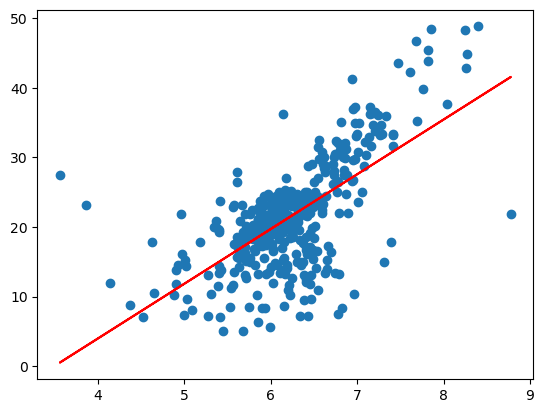

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.predict(X_train), color='r')
plt.show()

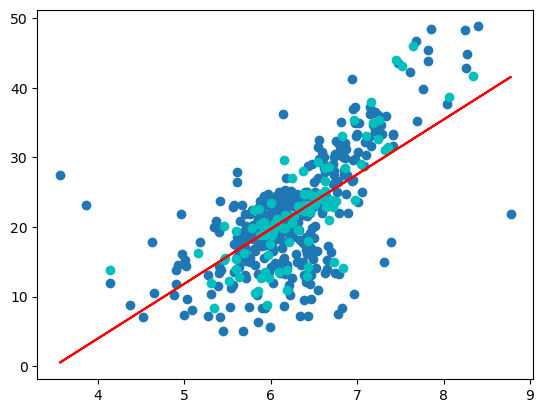

In [25]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color="c")
plt.plot(X_train, reg.predict(X_train), color='r')
plt.show()

In [26]:
y_predict = reg.predict(X_test)

### MSE

In [27]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

24.15660213438744

### RMSE

In [28]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846636

### MAE

In [29]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)
mae_test

3.543097440946387

### scikit-learn中的MSE和MAE

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [31]:
mean_squared_error(y_test, y_predict)

24.15660213438744

In [32]:
mean_absolute_error(y_test, y_predict)

3.543097440946387